# **Burhanuddin Abizer Hariyanawala**
### Intern Id : *OIB/M1/IP7734*

## Task 1 : **Iris Classification**

### *Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.*


# **Importing Modules**

In [ ]:
# Basic Data Exploration and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Modelling Libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Error measurement methods

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')



In [ ]:
data = pd.read_csv('/content/Iris.csv' , index_col = 'Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
data.shape

(150, 5)

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [ ]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

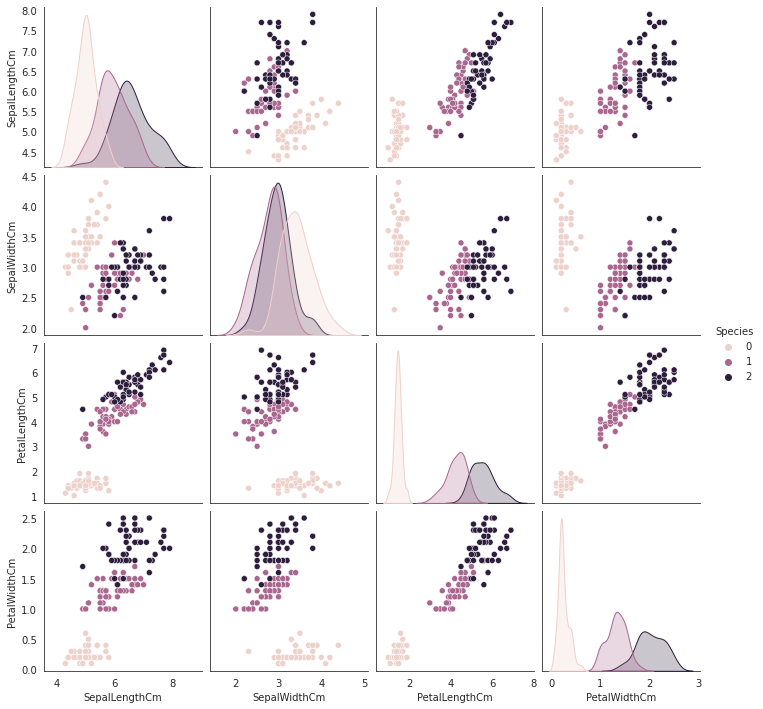

In [ ]:
sns.set_style('white')

sns.pairplot(data , hue="Species")

plt.show()

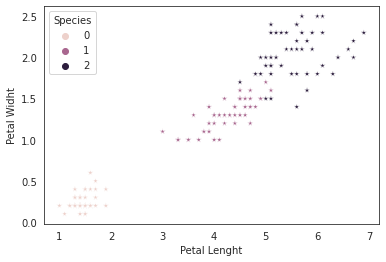

In [ ]:
sns.scatterplot(x=data['PetalLengthCm'] , y=data['PetalWidthCm'] , hue=data['Species'] , marker='*')
plt.xlabel("Petal Lenght")
plt.ylabel("Petal Widht")
plt.show()

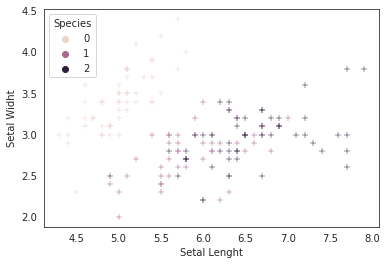

In [ ]:
sns.scatterplot(x=data['SepalLengthCm'] , y=data['SepalWidthCm'] , hue=data['Species'] , marker='+')
plt.xlabel("Setal Lenght")
plt.ylabel("Setal Widht")
plt.show()

**Featurr Selection Phase**

In [ ]:
X = data.drop('Species' , axis = 1)
y = data['Species']

## **Training Testing Phase**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state = 50)

# ***Logistic Regression***

In [ ]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)


LogisticRegression(max_iter=5000)

In [ ]:
predict = lr.predict(X_test)

In [ ]:
result = lr.score(X_test,y_test)
print(result * 100)

97.36842105263158


In [ ]:
Accuracy = accuracy_score(y_test , predict)
print("The accuracy is " , Accuracy*100)

The accuracy is  97.36842105263158


In [ ]:
Confusion_m = confusion_matrix(y_test,predict)
Confusion_m

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 12]])

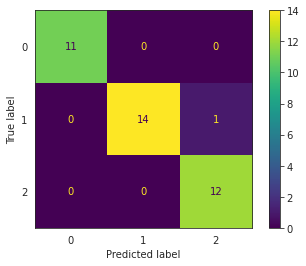

In [ ]:
ConfusionMatrixDisplay(Confusion_m).plot()


In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
print(lr.predict([[4.9,3.2,1.5,0.2]]))

[0]


# ***KNeighbour Classifier***

In [ ]:
model = KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
acc = model.score(X_test,y_test)
print("The accuracy of the model is :",acc*100)

The accuracy of the model is : 97.36842105263158


In [ ]:
predict = model.predict(X_test)

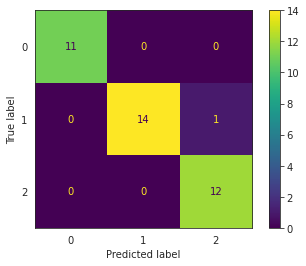

In [ ]:
Confusion_mat = confusion_matrix(y_test,predict)
ConfusionMatrixDisplay(Confusion_mat).plot()
plt.show()

In [ ]:
report = classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
print(lr.predict([[5.8,2.7,4.3,1.3]]))

[1]


# ***Support Vector Machine***

In [ ]:
svc = SVC()
svc.fit(X_train , y_train)


SVC()

In [ ]:
pred = svc.predict(X_test)

In [ ]:
acc = svc.score(X_test,y_test)
print("The accuracy of the model is :",acc*100)

The accuracy of the model is : 94.73684210526315


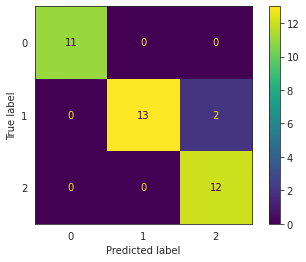

In [ ]:
Confusion_mat = confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(Confusion_mat).plot()
plt.show()

In [ ]:
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
print(lr.predict([[6.9,3.4,6.1,2.3]]))

[2]
